## 1. Load Libraries and Data

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
sales_df = pd.read_csv('sales_data_modified.csv')
weather_df = pd.read_csv('weather_data.csv')

print(f"Sales: {sales_df.shape} | Weather: {weather_df.shape}")

Sales: (146671, 10) | Weather: (1111, 4)


## 2. Data Overview

In [71]:
# Sales data
display(sales_df.head())
display(sales_df.info())
display(sales_df.describe())


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,2021-01-01,Metrocity
1,I313757,C438201,Female,43,Clothing,4,1200.32,Credit Card,2021-01-01,Mall of Istanbul
2,I836951,C382440,Male,54,Clothing,3,900.24,Cash,2021-01-01,Metrocity
3,I159235,C312481,Male,58,Food & Beverage,4,20.92,Credit Card,2021-01-01,Mall of Istanbul
4,I115941,C105769,Male,34,Clothing,1,300.08,Cash,2021-01-01,Istinye Park


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146671 entries, 0 to 146670
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   invoice_no      146671 non-null  object 
 1   customer_id     146671 non-null  object 
 2   gender          146671 non-null  object 
 3   age             146671 non-null  int64  
 4   category        146671 non-null  object 
 5   quantity        146671 non-null  int64  
 6   price           145205 non-null  float64
 7   payment_method  146671 non-null  object 
 8   invoice_date    146671 non-null  object 
 9   shopping_mall   146671 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 11.2+ MB


None

,age,quantity,price
count,146671.000000,146671.000000,145205.000000
mean,43.441055,3.003579,718.807499
std,15.004247,1.413662,1056.058692
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,179.200000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,15750.000000


In [72]:
print("\nMissing values:")
sales_df.isnull().sum()


Missing values:


invoice_no           0
customer_id          0
gender               0
age                  0
category             0
quantity             0
price             1466
payment_method       0
invoice_date         0
shopping_mall        0
dtype: int64

---


In [73]:
# Weather data
display(weather_df.head())
display(weather_df.info())
print("\nMissing values:")
display(weather_df.isnull().sum())

,date,temperature_2m_max,temperature_2m_min,rain_sum
0,2021-01-01 00:00:00+00:00,13.806000,7.756000,4.2
1,2021-01-02 00:00:00+00:00,15.906000,5.656000,0.0
2,2021-01-03 00:00:00+00:00,14.456000,8.256001,0.2
3,2021-01-04 00:00:00+00:00,15.556000,8.756001,0.0
4,2021-01-05 00:00:00+00:00,14.756001,7.656000,1.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1111 non-null   object 
 1   temperature_2m_max  1111 non-null   float64
 2   temperature_2m_min  1111 non-null   float64
 3   rain_sum            1111 non-null   float64
dtypes: float64(3), object(1)
memory usage: 34.8+ KB


None


Missing values:


date                  0
temperature_2m_max    0
temperature_2m_min    0
rain_sum              0
dtype: int64

## 3. Data Preparation

In [74]:
# Convert thành datetime
sales_df['invoice_date'] = pd.to_datetime(sales_df['invoice_date'])
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Chỉ lấy ngày, không lấy giờ
weather_df['date'] = weather_df['date'].dt.date
sales_df['date'] = sales_df['invoice_date'].dt.date

print("✓ Date conversion completed")

✓ Date conversion completed


## 4. Exploratory Data Analysis

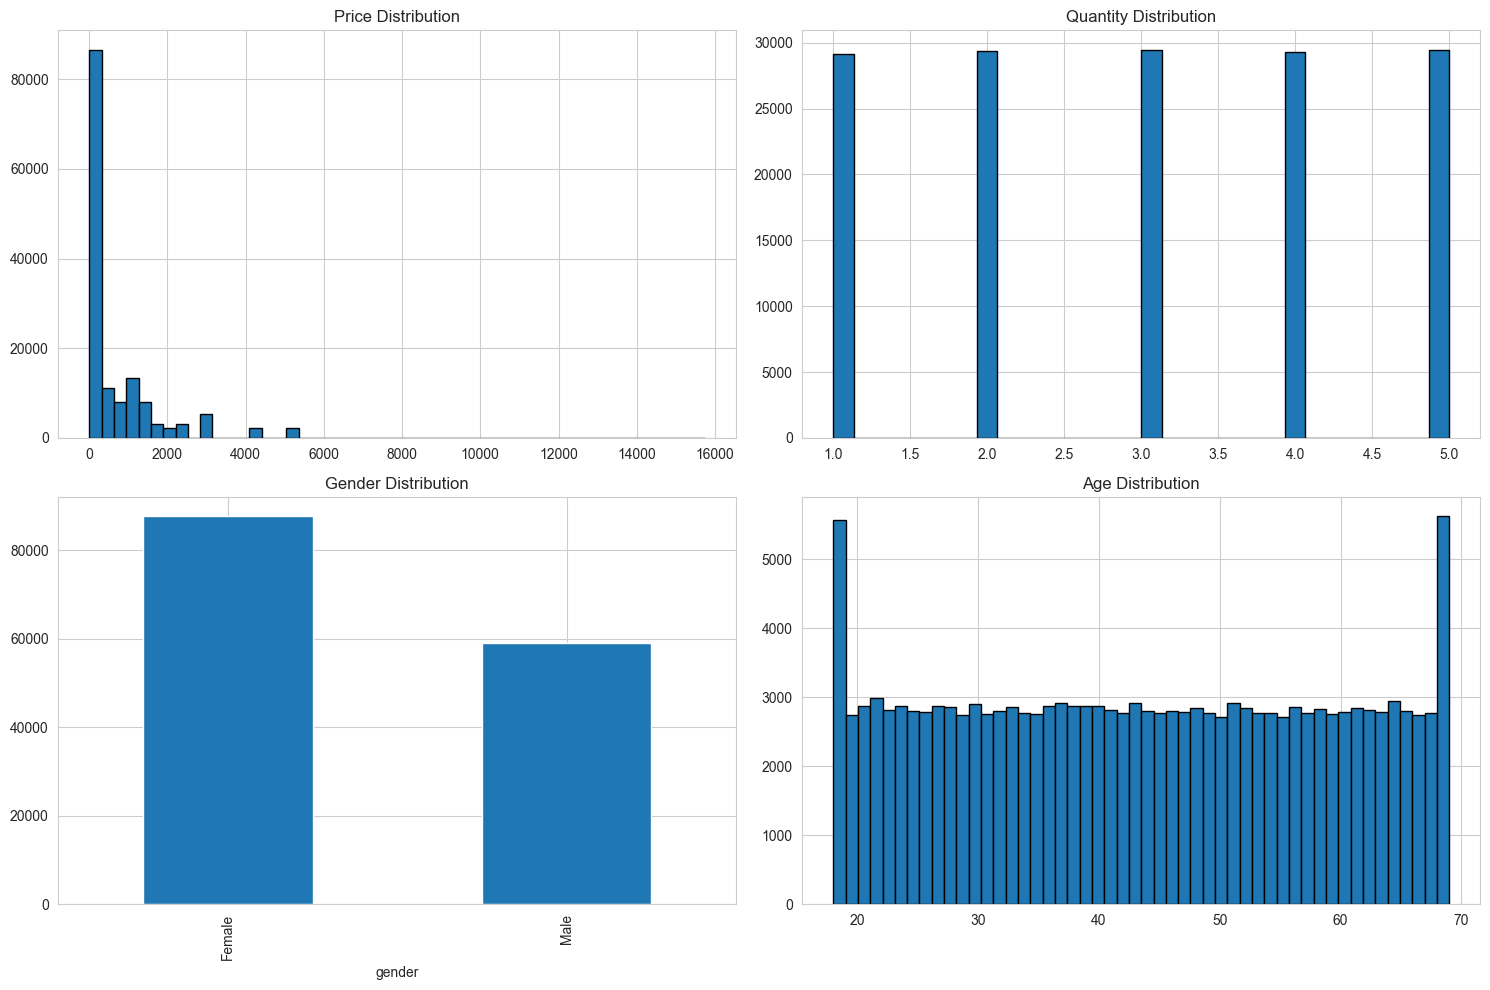

In [75]:
# Sales distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Vẽ histogram 50 bins để xem giá bán có lệch, có outlier hay không.
axes[0, 0].hist(sales_df['price'], bins=50, edgecolor='black')
axes[0, 0].set_title('Price Distribution')

# Kiểm tra số lượng mỗi lần mua có phân phối như thế nào.
axes[0, 1].hist(sales_df['quantity'], bins=30, edgecolor='black')
axes[0, 1].set_title('Quantity Distribution')

# Vẽ bar chart thể hiện số lượng khách hàng theo giới tính.
sales_df['gender'].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')

# Histogram tuổi để xem khách hàng tập trung ở nhóm nào.
axes[1, 1].hist(sales_df['age'], bins=50, edgecolor='black')
axes[1, 1].set_title('Age Distribution')

plt.tight_layout()
plt.savefig('image/eda_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

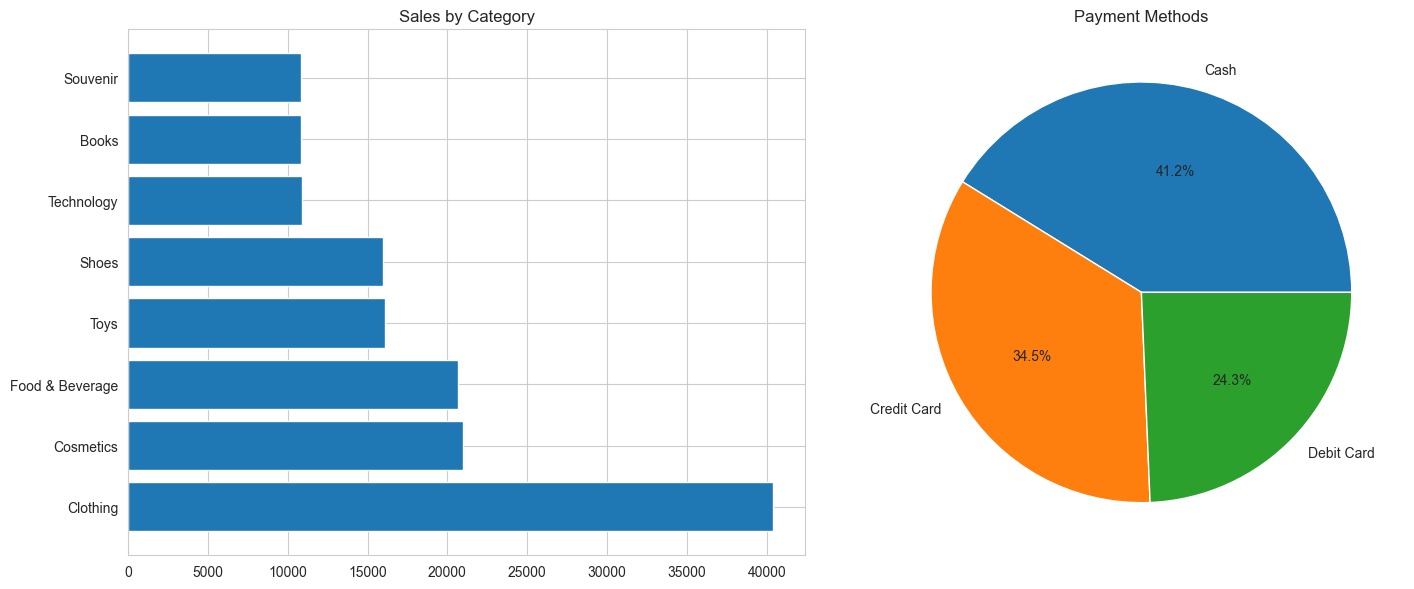

In [76]:
# Category and payment analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#Biểu đồ cho bạn thấy nhóm sản phẩm nào bán nhiều nhất.
category_counts = sales_df['category'].value_counts()
axes[0].barh(category_counts.index, category_counts.values)
axes[0].set_title('Sales by Category')

#Đếm số giao dịch theo từng loại thanh toán
payment_counts = sales_df['payment_method'].value_counts()
axes[1].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
axes[1].set_title('Payment Methods')

plt.tight_layout()
plt.savefig('image/eda_categories.png', dpi=300, bbox_inches='tight')
plt.show()

---


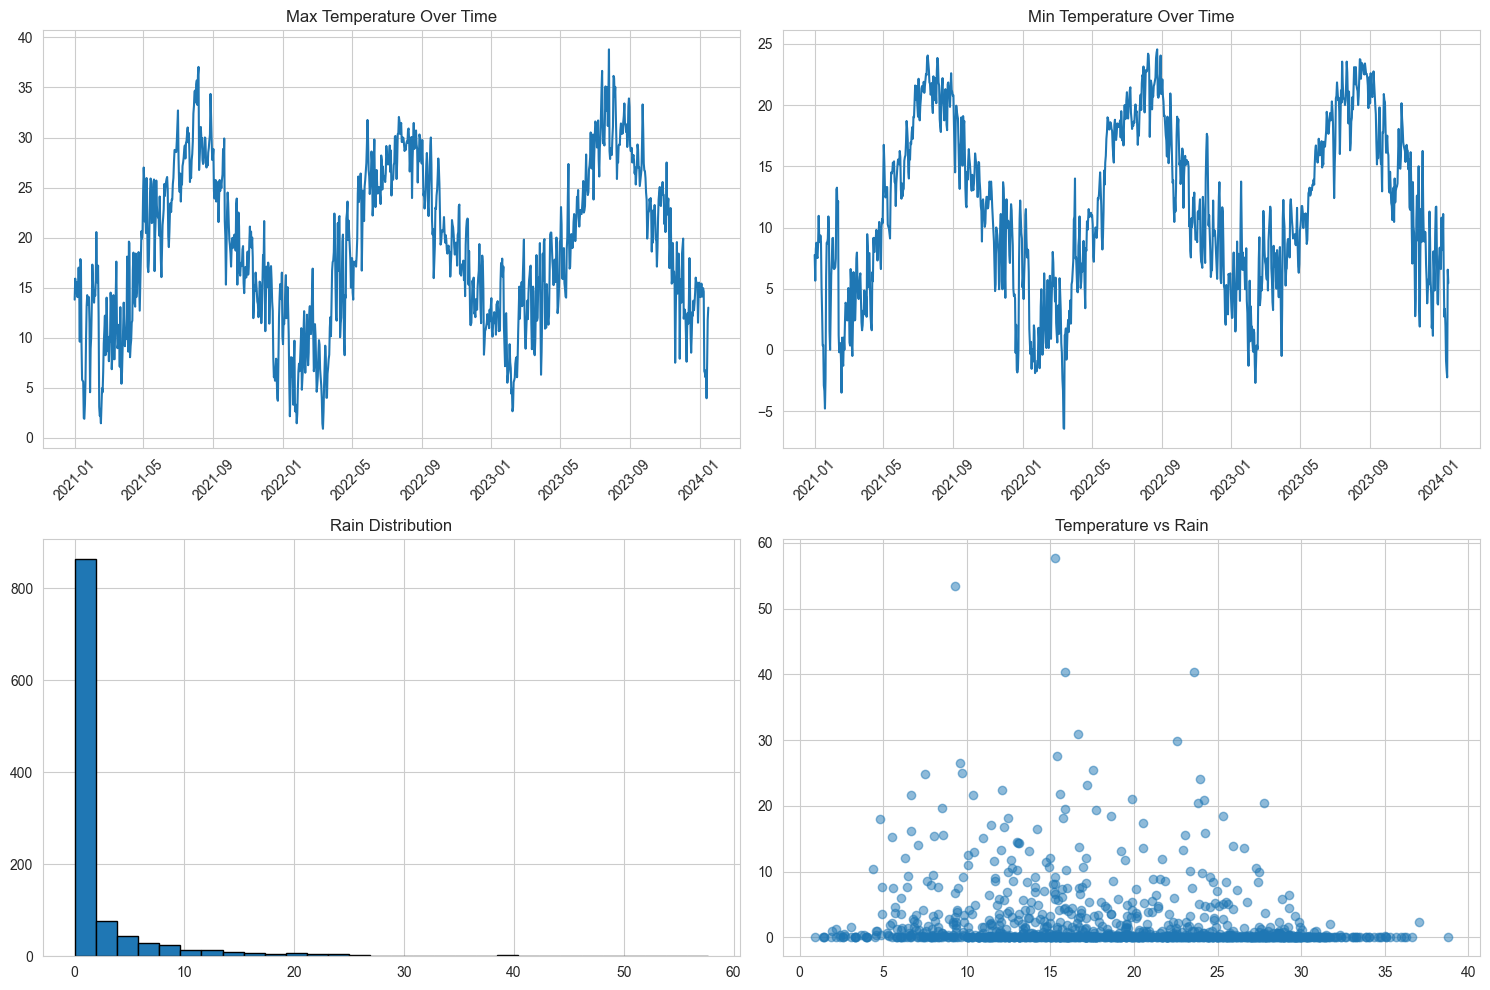

In [77]:
# Weather patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# Vẽ đường thể hiện nhiệt độ cao nhất mỗi ngày.
axes[0, 0].plot(weather_df['date'], weather_df['temperature_2m_max'])
axes[0, 0].set_title('Max Temperature Over Time')
axes[0, 0].tick_params(axis='x', rotation=45)

#Vẽ đường thể hiện nhiệt độ thấp nhất mỗi ngày
axes[0, 1].plot(weather_df['date'], weather_df['temperature_2m_min'])
axes[0, 1].set_title('Min Temperature Over Time')
axes[0, 1].tick_params(axis='x', rotation=45)

# Phân phối lượng mưa
axes[1, 0].hist(weather_df['rain_sum'], bins=30, edgecolor='black')
axes[1, 0].set_title('Rain Distribution')

axes[1, 1].scatter(weather_df['temperature_2m_max'], weather_df['rain_sum'], alpha=0.5)
axes[1, 1].set_title('Temperature vs Rain')

plt.tight_layout()
plt.savefig('image/eda_weather.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Feature Engineering

In [78]:
# Sales features
sales_df['total_amount'] = sales_df['price'] * sales_df['quantity'] # tổng giá
# tách
sales_df['year'] = sales_df['invoice_date'].dt.year
sales_df['month'] = sales_df['invoice_date'].dt.month
sales_df['day'] = sales_df['invoice_date'].dt.day
sales_df['day_of_week'] = sales_df['invoice_date'].dt.dayofweek
sales_df['day_name'] = sales_df['invoice_date'].dt.day_name()
sales_df['week_of_year'] = sales_df['invoice_date'].dt.isocalendar().week
sales_df['is_weekend'] = sales_df['day_of_week'].isin([5, 6]).astype(int)
sales_df['quarter'] = sales_df['invoice_date'].dt.quarter
# chia age
sales_df['age_group'] = pd.cut(sales_df['age'], 
                                bins=[0, 18, 30, 45, 60, 100],
                                labels=['Teen', 'Young Adult', 'Middle Age', 'Senior', 'Elderly'])

print("✓ Sales features created")
display(sales_df[['invoice_date', 'total_amount', 'day_name', 'is_weekend', 'age_group']].head())

✓ Sales features created


,invoice_date,total_amount,day_name,is_weekend,age_group
0,2021-01-01,130.75,Friday,0,Elderly
1,2021-01-01,4801.28,Friday,0,Middle Age
2,2021-01-01,2700.72,Friday,0,Senior
3,2021-01-01,83.68,Friday,0,Senior
4,2021-01-01,300.08,Friday,0,Middle Age


---


In [79]:
# Weather features
weather_df['temperature_avg'] = (weather_df['temperature_2m_max'] + weather_df['temperature_2m_min']) / 2
weather_df['temperature_range'] = weather_df['temperature_2m_max'] - weather_df['temperature_2m_min']
weather_df['is_rainy'] = (weather_df['rain_sum'] > 0).astype(int)
weather_df['rain_category'] = pd.cut(weather_df['rain_sum'],
                                      bins=[-0.1, 0, 5, 20, 100],
                                      labels=['No Rain', 'Light', 'Moderate', 'Heavy'])

print("✓ Weather features created")
display(weather_df[['date', 'temperature_avg', 'temperature_range', 'rain_category']].head())

✓ Weather features created


,date,temperature_avg,temperature_range,rain_category
0,2021-01-01,10.781,6.050000,Light
1,2021-01-02,10.781,10.250000,No Rain
2,2021-01-03,11.356,6.199999,Light
3,2021-01-04,12.156,6.799999,No Rain
4,2021-01-05,11.206,7.100001,Light


## 6. Merge Datasets

In [80]:
# Join 2 dataset
merged_df = sales_df.merge(weather_df, on='date', how='left')

print(f"Merged shape: {merged_df.shape}")
print(f"Missing weather data: {merged_df['temperature_2m_max'].isnull().sum()} rows")
display(merged_df.head())

Merged shape: (146671, 28)
Missing weather data: 0 rows


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,...,is_weekend,quarter,age_group,temperature_2m_max,temperature_2m_min,rain_sum,temperature_avg,temperature_range,is_rainy,rain_category
0,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,2021-01-01,Metrocity,...,0,1,Elderly,13.806,7.756,4.2,10.781,6.05,1,Light
1,I313757,C438201,Female,43,Clothing,4,1200.32,Credit Card,2021-01-01,Mall of Istanbul,...,0,1,Middle Age,13.806,7.756,4.2,10.781,6.05,1,Light
2,I836951,C382440,Male,54,Clothing,3,900.24,Cash,2021-01-01,Metrocity,...,0,1,Senior,13.806,7.756,4.2,10.781,6.05,1,Light
3,I159235,C312481,Male,58,Food & Beverage,4,20.92,Credit Card,2021-01-01,Mall of Istanbul,...,0,1,Senior,13.806,7.756,4.2,10.781,6.05,1,Light
4,I115941,C105769,Male,34,Clothing,1,300.08,Cash,2021-01-01,Istinye Park,...,0,1,Middle Age,13.806,7.756,4.2,10.781,6.05,1,Light


## 7. Thống kê qua dữ liệu được merge


In [81]:
# Thống kê kinh doanh từng ngày
daily_sales = merged_df.groupby('date').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'quantity': ['sum', 'mean'],
    'customer_id': 'nunique'
}).reset_index()

daily_sales.columns = ['date', 'daily_revenue', 'avg_transaction', 'num_transactions',
                       'total_quantity', 'avg_quantity', 'unique_customers']

print("Daily Sales Summary:")
display(daily_sales.head())
display(daily_sales.describe())

Daily Sales Summary:


,date,daily_revenue,avg_transaction,num_transactions,total_quantity,avg_quantity,unique_customers
0,2021-01-01,268491.94,2581.653269,104,333,3.171429,105
1,2021-01-02,303612.07,2282.797519,133,387,2.888060,134
2,2021-01-03,372950.91,2762.599333,135,405,2.956204,137
3,2021-01-04,284512.26,2390.859328,119,379,3.184874,119
4,2021-01-05,300545.93,2568.768632,117,374,3.116667,120


,daily_revenue,avg_transaction,num_transactions,total_quantity,avg_quantity,unique_customers
count,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000
mean,323389.242829,2481.551323,130.815315,396.881081,3.004289,132.128829
std,58415.734628,392.146953,16.598020,51.848711,0.122523,16.684863
min,163229.140000,1269.777308,92.000000,274.000000,2.558140,93.000000
25%,282412.865000,2207.862108,119.000000,361.000000,2.921903,121.000000
50%,321195.760000,2454.929337,128.000000,390.000000,3.000000,129.000000
75%,359916.267500,2730.835805,141.000000,431.000000,3.087347,142.000000
max,660045.610000,3902.448739,269.000000,775.000000,3.424242,271.000000


In [82]:
# Thống kê theo từng category
category_stats = merged_df.groupby('category').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'quantity': 'sum'
}).round(2)

category_stats.columns = ['total_revenue', 'avg_transaction', 'num_transactions', 'total_quantity']
category_stats = category_stats.sort_values('total_revenue', ascending=False)

print("Category Performance:")
display(category_stats)

Category Performance:


,total_revenue,avg_transaction,num_transactions,total_quantity
category,,,,
Clothing,1.289105e+08,3223.57,39990,121402
Technology,1.132604e+08,10475.43,10812,32818
Shoes,9.802937e+07,6211.86,15781,47979
Cosmetics,8.876037e+06,428.17,20730,63080
Toys,5.896540e+06,370.22,15927,48434
Books,1.628413e+06,151.62,10740,32601
Souvenir,1.245269e+06,115.99,10736,32345
Food & Beverage,1.115617e+06,54.45,20489,61879


## 8. Correlation Analysis

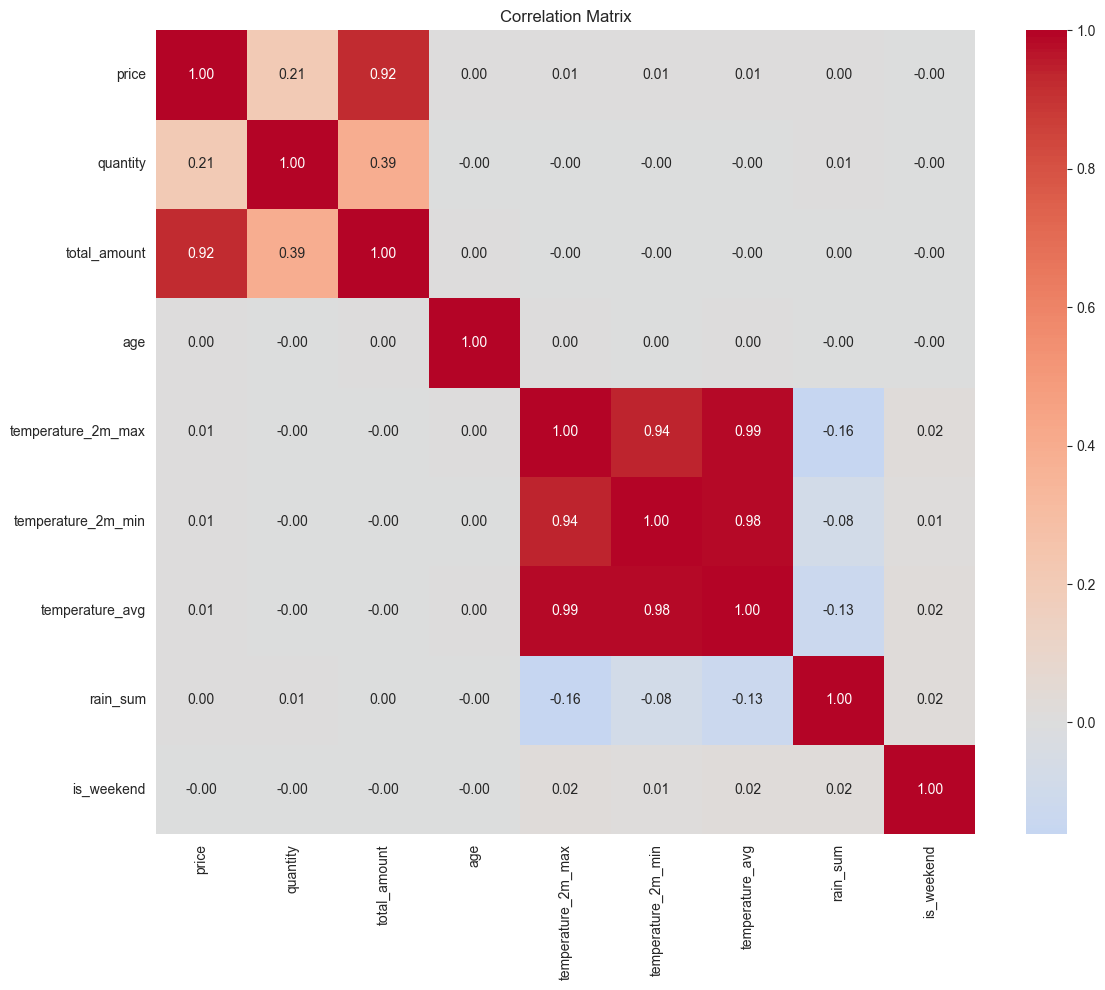


Strong Correlations (|r| > 0.5):
price <-> total_amount: 0.919
temperature_2m_max <-> temperature_2m_min: 0.939
temperature_2m_max <-> temperature_avg: 0.987
temperature_2m_min <-> temperature_avg: 0.982


In [83]:
# Correlation matrix
numeric_cols = ['price', 'quantity', 'total_amount', 'age', 
                'temperature_2m_max', 'temperature_2m_min', 
                'temperature_avg', 'rain_sum', 'is_weekend']

correlation_matrix = merged_df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('image/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Find strong correlations
print("\nStrong Correlations (|r| > 0.5):")
strong_corr = correlation_matrix.abs() > 0.5
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        if strong_corr.iloc[i, j]:
            print(f"{correlation_matrix.index[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

### Phân tích heatmap

#### 6. Những điểm đáng chú ý nhất từ heatmap

1. **Redundancy**: 3 biến nhiệt độ gần như trùng nhau.
2. **price là yếu tố quyết định chính của total_amount**.
3. **quantity chỉ có tương quan vừa phải**.
4. **Weather hầu như không ảnh hưởng đến sales** (theo tương quan tuyến tính).
5. **is_weekend không thể hiện sự khác biệt rõ ràng**.



## 9. Advanced Analysis

### 9.1 Time Series Analysis

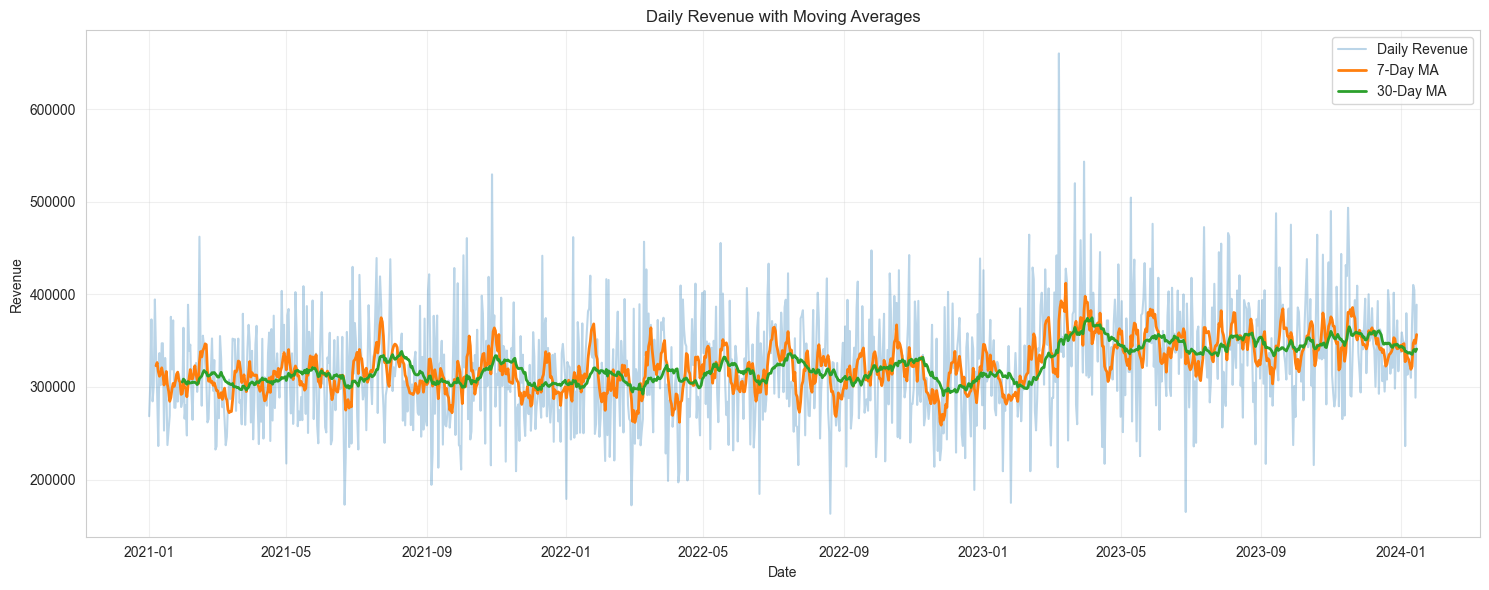

Revenue Statistics:
Average Daily Revenue: $323,389.24
Max Daily Revenue: $660,045.61
Min Daily Revenue: $163,229.14
Std Dev: $58,415.73


In [84]:
# Daily revenue trend with moving average
daily_sales['date'] = pd.to_datetime(daily_sales['date'])
daily_sales = daily_sales.sort_values('date')
daily_sales['revenue_ma7'] = daily_sales['daily_revenue'].rolling(window=7).mean()
daily_sales['revenue_ma30'] = daily_sales['daily_revenue'].rolling(window=30).mean()

plt.figure(figsize=(15, 6))
plt.plot(daily_sales['date'], daily_sales['daily_revenue'], alpha=0.3, label='Daily Revenue')
plt.plot(daily_sales['date'], daily_sales['revenue_ma7'], label='7-Day MA', linewidth=2)
plt.plot(daily_sales['date'], daily_sales['revenue_ma30'], label='30-Day MA', linewidth=2)
plt.title('Daily Revenue with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('image/revenue_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("Revenue Statistics:")
print(f"Average Daily Revenue: ${daily_sales['daily_revenue'].mean():,.2f}")
print(f"Max Daily Revenue: ${daily_sales['daily_revenue'].max():,.2f}")
print(f"Min Daily Revenue: ${daily_sales['daily_revenue'].min():,.2f}")
print(f"Std Dev: ${daily_sales['daily_revenue'].std():,.2f}")

### 9.2 Customer Behavior Analysis

Customer Segments:
Total Customers: 140,310

Top 10% Customers contribute: $183,984,923.36
Average Customer Lifetime Value: $2,558.35
Average Purchases per Customer: 1.0


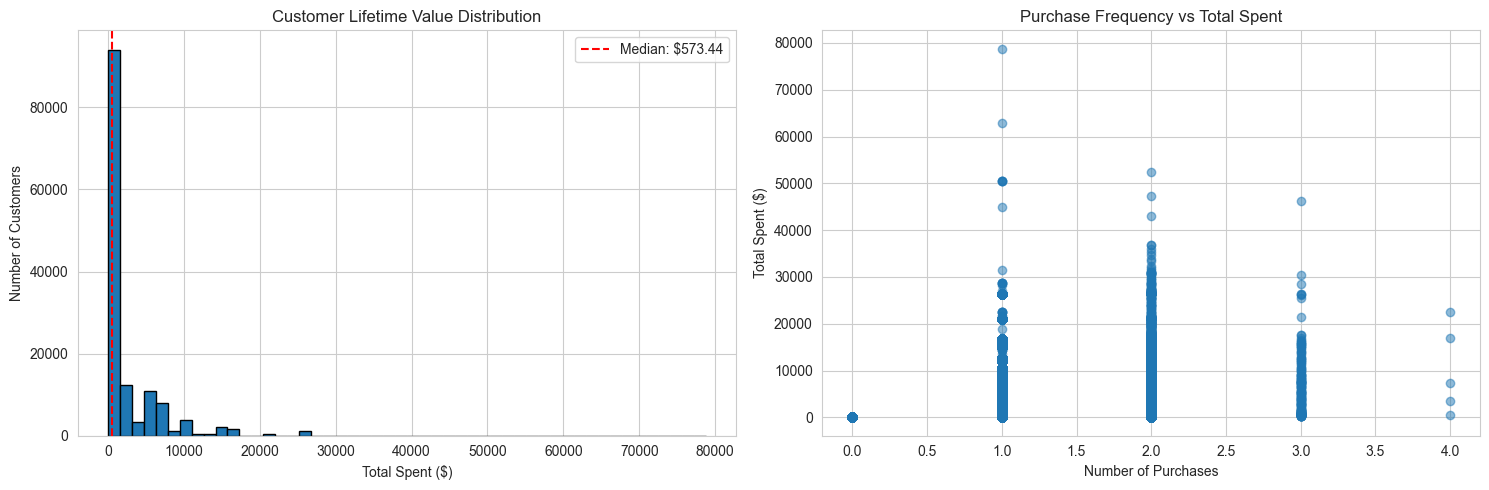

In [85]:
# Customer purchasing patterns
customer_stats = merged_df.groupby('customer_id').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'quantity': 'sum',
    'invoice_date': ['min', 'max']
}).round(2)

customer_stats.columns = ['total_spent', 'avg_transaction', 'num_purchases', 
                         'total_items', 'first_purchase', 'last_purchase']
customer_stats['customer_lifetime_days'] = (customer_stats['last_purchase'] - 
                                            customer_stats['first_purchase']).dt.days

print("Customer Segments:")
print(f"Total Customers: {len(customer_stats):,}")
print(f"\nTop 10% Customers contribute: ${customer_stats.nlargest(int(len(customer_stats)*0.1), 'total_spent')['total_spent'].sum():,.2f}")
print(f"Average Customer Lifetime Value: ${customer_stats['total_spent'].mean():,.2f}")
print(f"Average Purchases per Customer: {customer_stats['num_purchases'].mean():.1f}")

# Visualize customer value distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(customer_stats['total_spent'], bins=50, edgecolor='black')
axes[0].set_title('Customer Lifetime Value Distribution')
axes[0].set_xlabel('Total Spent ($)')
axes[0].set_ylabel('Number of Customers')
axes[0].axvline(customer_stats['total_spent'].median(), color='r', 
                linestyle='--', label=f"Median: ${customer_stats['total_spent'].median():.2f}")
axes[0].legend()

axes[1].scatter(customer_stats['num_purchases'], customer_stats['total_spent'], alpha=0.5)
axes[1].set_title('Purchase Frequency vs Total Spent')
axes[1].set_xlabel('Number of Purchases')
axes[1].set_ylabel('Total Spent ($)')

plt.tight_layout()
plt.savefig('image/customer_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

### 9.3 Seasonal Patterns

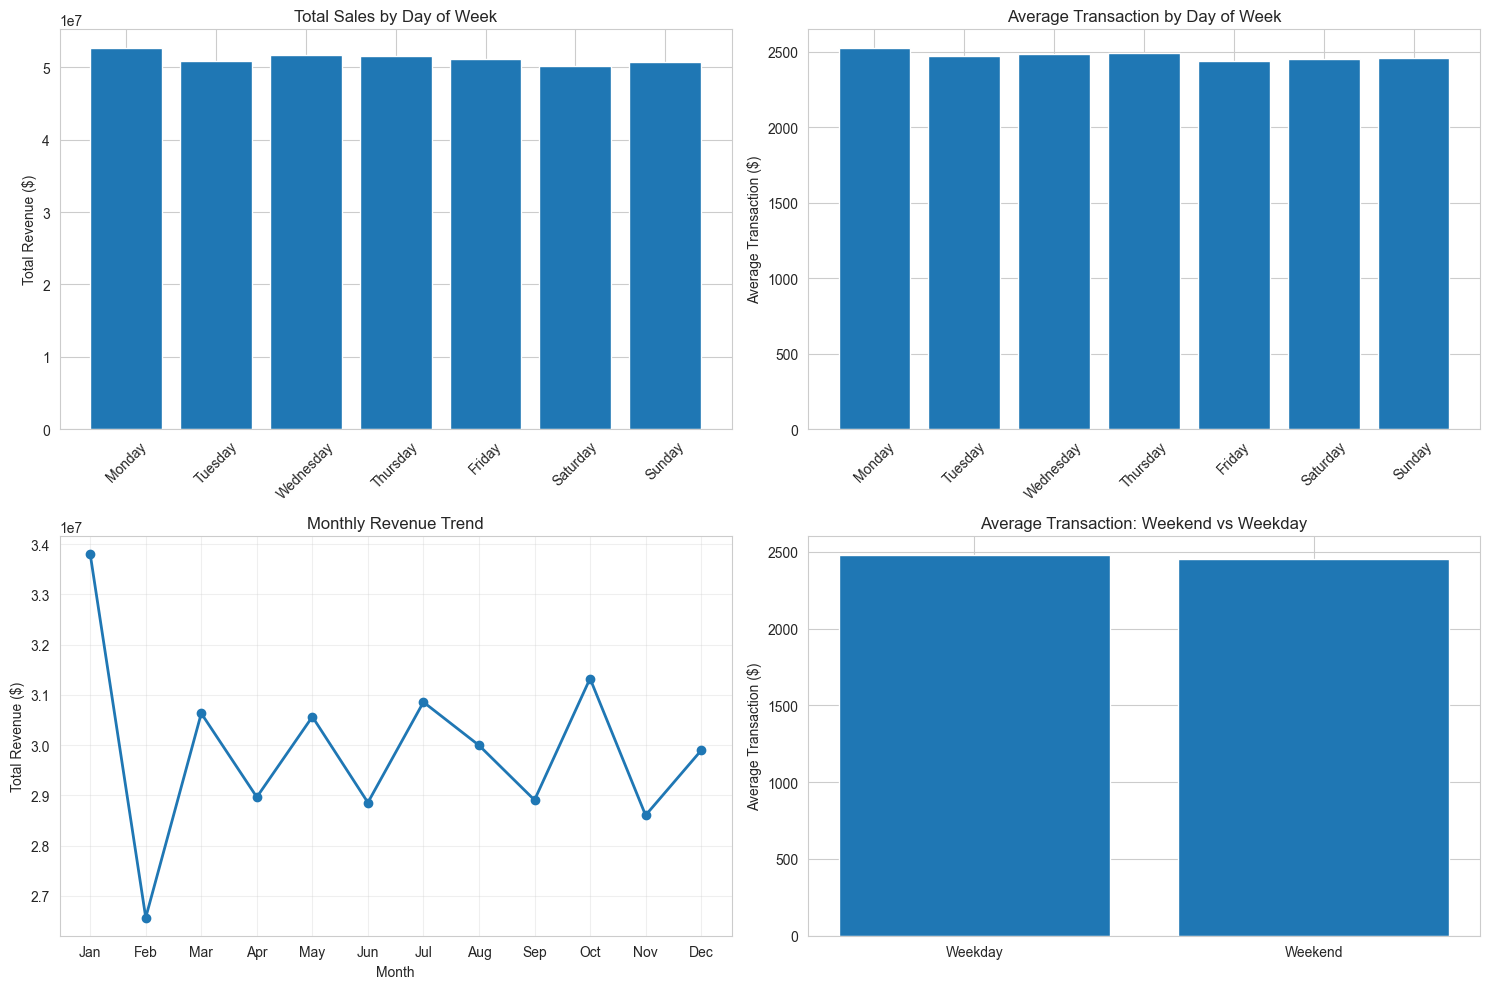


Seasonal Insights:
Best Day: Monday ($52,631,070.14)
Best Month: Jan ($33,802,855.94)

Weekend vs Weekday:
Weekday Avg Transaction: $2480.08
Weekend Avg Transaction: $2451.95


In [86]:
# Sales by day of week and hour
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Day of week
dow_sales = merged_df.groupby('day_name')['total_amount'].agg(['sum', 'mean', 'count'])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales = dow_sales.reindex(day_order)

axes[0, 0].bar(dow_sales.index, dow_sales['sum'])
axes[0, 0].set_title('Total Sales by Day of Week')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylabel('Total Revenue ($)')

axes[0, 1].bar(dow_sales.index, dow_sales['mean'])
axes[0, 1].set_title('Average Transaction by Day of Week')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylabel('Average Transaction ($)')

# Monthly trends
monthly_sales = merged_df.groupby('month')['total_amount'].agg(['sum', 'mean', 'count'])
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

axes[1, 0].plot(monthly_sales.index, monthly_sales['sum'], marker='o', linewidth=2)
axes[1, 0].set_title('Monthly Revenue Trend')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Total Revenue ($)')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(month_names)
axes[1, 0].grid(True, alpha=0.3)

# Weekend vs Weekday
weekend_comparison = merged_df.groupby('is_weekend')['total_amount'].agg(['sum', 'mean', 'count'])
weekend_comparison.index = ['Weekday', 'Weekend']
axes[1, 1].bar(weekend_comparison.index, weekend_comparison['mean'])
axes[1, 1].set_title('Average Transaction: Weekend vs Weekday')
axes[1, 1].set_ylabel('Average Transaction ($)')

plt.tight_layout()
plt.savefig('image/seasonal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nSeasonal Insights:")
print(f"Best Day: {dow_sales['sum'].idxmax()} (${dow_sales['sum'].max():,.2f})")
print(f"Best Month: {month_names[monthly_sales['sum'].idxmax()-1]} (${monthly_sales['sum'].max():,.2f})")
print(f"\nWeekend vs Weekday:")
print(f"Weekday Avg Transaction: ${weekend_comparison.loc['Weekday', 'mean']:.2f}")
print(f"Weekend Avg Transaction: ${weekend_comparison.loc['Weekend', 'mean']:.2f}")

### 9.4 Weather Impact Analysis

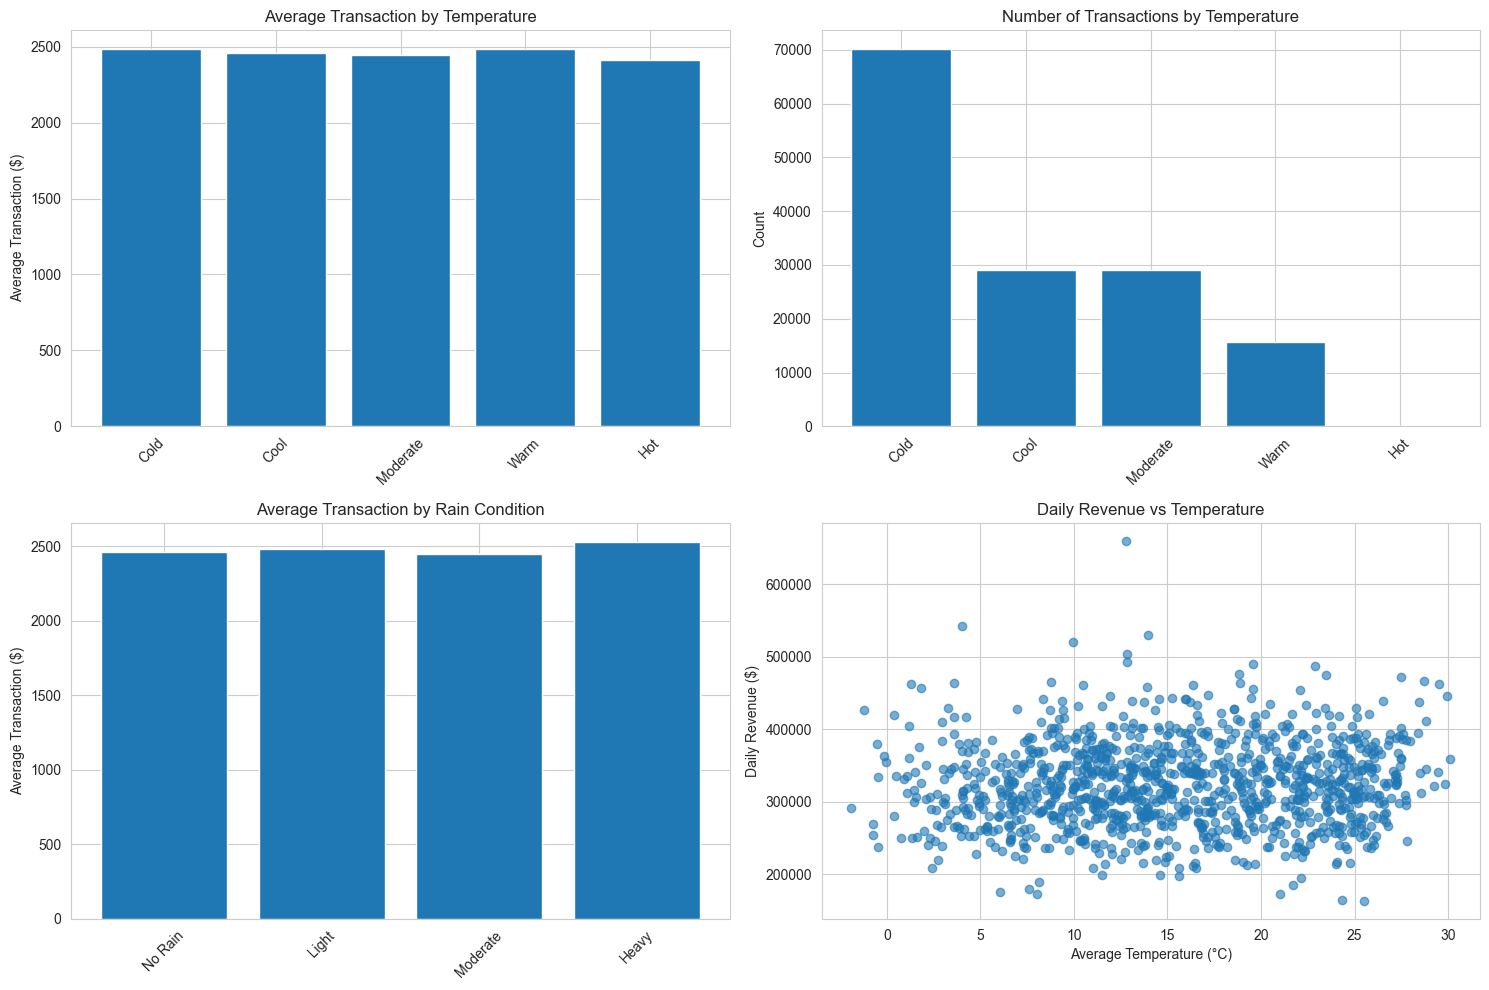


Weather Impact Insights:

Best Temperature Range: Cold ($2482.73 avg)
Best Rain Condition: Heavy ($2531.78 avg)

Rainy Days Avg: $2478.90
No Rain Days Avg: $2465.46
Difference: 0.5%


In [87]:
# Temperature bins
merged_df['temp_category'] = pd.cut(merged_df['temperature_avg'], 
                                     bins=[0, 15, 20, 25, 30, 50],
                                     labels=['Cold', 'Cool', 'Moderate', 'Warm', 'Hot'])

# Sales by temperature and rain
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Temperature impact
temp_sales = merged_df.groupby('temp_category')['total_amount'].agg(['mean', 'sum', 'count'])
axes[0, 0].bar(temp_sales.index.astype(str), temp_sales['mean'])
axes[0, 0].set_title('Average Transaction by Temperature')
axes[0, 0].set_ylabel('Average Transaction ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].bar(temp_sales.index.astype(str), temp_sales['count'])
axes[0, 1].set_title('Number of Transactions by Temperature')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Rain impact
rain_sales = merged_df.groupby('rain_category')['total_amount'].agg(['mean', 'sum', 'count'])
axes[1, 0].bar(rain_sales.index.astype(str), rain_sales['mean'])
axes[1, 0].set_title('Average Transaction by Rain Condition')
axes[1, 0].set_ylabel('Average Transaction ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Scatter: Temperature vs Daily Revenue
daily_weather_sales = merged_df.groupby('date').agg({
    'total_amount': 'sum',
    'temperature_avg': 'first',
    'rain_sum': 'first'
})

axes[1, 1].scatter(daily_weather_sales['temperature_avg'], 
                   daily_weather_sales['total_amount'], 
                   alpha=0.6)
axes[1, 1].set_title('Daily Revenue vs Temperature')
axes[1, 1].set_xlabel('Average Temperature (°C)')
axes[1, 1].set_ylabel('Daily Revenue ($)')

plt.tight_layout()
plt.savefig('image/weather_impact.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nWeather Impact Insights:")
print(f"\nBest Temperature Range: {temp_sales['mean'].idxmax()} (${temp_sales['mean'].max():.2f} avg)")
print(f"Best Rain Condition: {rain_sales['mean'].idxmax()} (${rain_sales['mean'].max():.2f} avg)")

# Statistical test
rainy_sales = merged_df[merged_df['is_rainy'] == 1]['total_amount']
no_rain_sales = merged_df[merged_df['is_rainy'] == 0]['total_amount']
print(f"\nRainy Days Avg: ${rainy_sales.mean():.2f}")
print(f"No Rain Days Avg: ${no_rain_sales.mean():.2f}")
print(f"Difference: {((rainy_sales.mean() - no_rain_sales.mean()) / no_rain_sales.mean() * 100):.1f}%")

### 9.5 Product Category Deep Dive

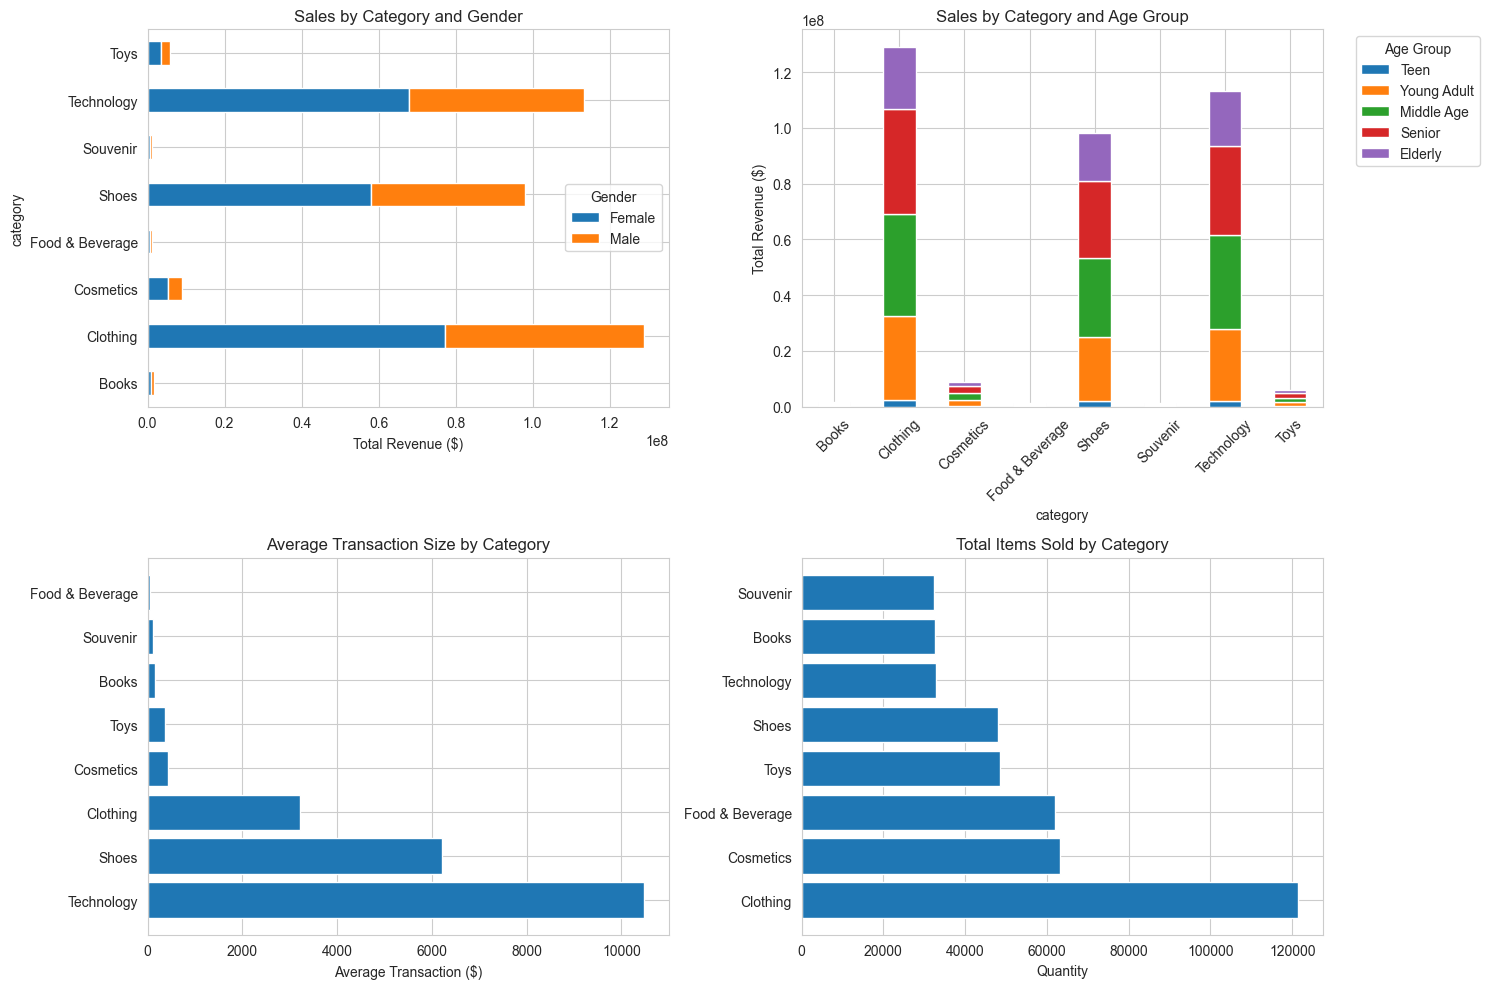


Category Performance Summary:

Top 3 Categories by Revenue:
category
Clothing      1.289105e+08
Technology    1.132604e+08
Shoes         9.802937e+07
Name: total_revenue, dtype: float64

Top 3 Categories by Average Transaction:
category
Technology    10475.430078
Shoes          6211.860283
Clothing       3223.567566
Name: total_amount, dtype: float64

Top 3 Categories by Items Sold:
category
Clothing           121402
Cosmetics           63080
Food & Beverage     61879
Name: quantity, dtype: int64


In [88]:
# Category analysis by demographics
category_gender = pd.crosstab(merged_df['category'], merged_df['gender'], 
                               values=merged_df['total_amount'], aggfunc='sum')
category_age = merged_df.groupby(['category', 'age_group'])['total_amount'].sum().unstack(fill_value=0)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Category by gender
category_gender.plot(kind='barh', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Sales by Category and Gender')
axes[0, 0].set_xlabel('Total Revenue ($)')
axes[0, 0].legend(title='Gender')

# Category by age group
category_age.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Sales by Category and Age Group')
axes[0, 1].set_ylabel('Total Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(title='Age Group', bbox_to_anchor=(1.05, 1))

# Average transaction size by category
category_avg = merged_df.groupby('category')['total_amount'].mean().sort_values(ascending=False)
axes[1, 0].barh(category_avg.index, category_avg.values)
axes[1, 0].set_title('Average Transaction Size by Category')
axes[1, 0].set_xlabel('Average Transaction ($)')

# Items sold by category
category_items = merged_df.groupby('category')['quantity'].sum().sort_values(ascending=False)
axes[1, 1].barh(category_items.index, category_items.values)
axes[1, 1].set_title('Total Items Sold by Category')
axes[1, 1].set_xlabel('Quantity')

plt.tight_layout()
plt.savefig('image/category_deep_dive.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCategory Performance Summary:")
print("\nTop 3 Categories by Revenue:")
print(category_stats['total_revenue'].head(3))
print("\nTop 3 Categories by Average Transaction:")
print(category_avg.head(3))
print("\nTop 3 Categories by Items Sold:")
print(category_items.head(3))

### 9.6 Payment Method Analysis

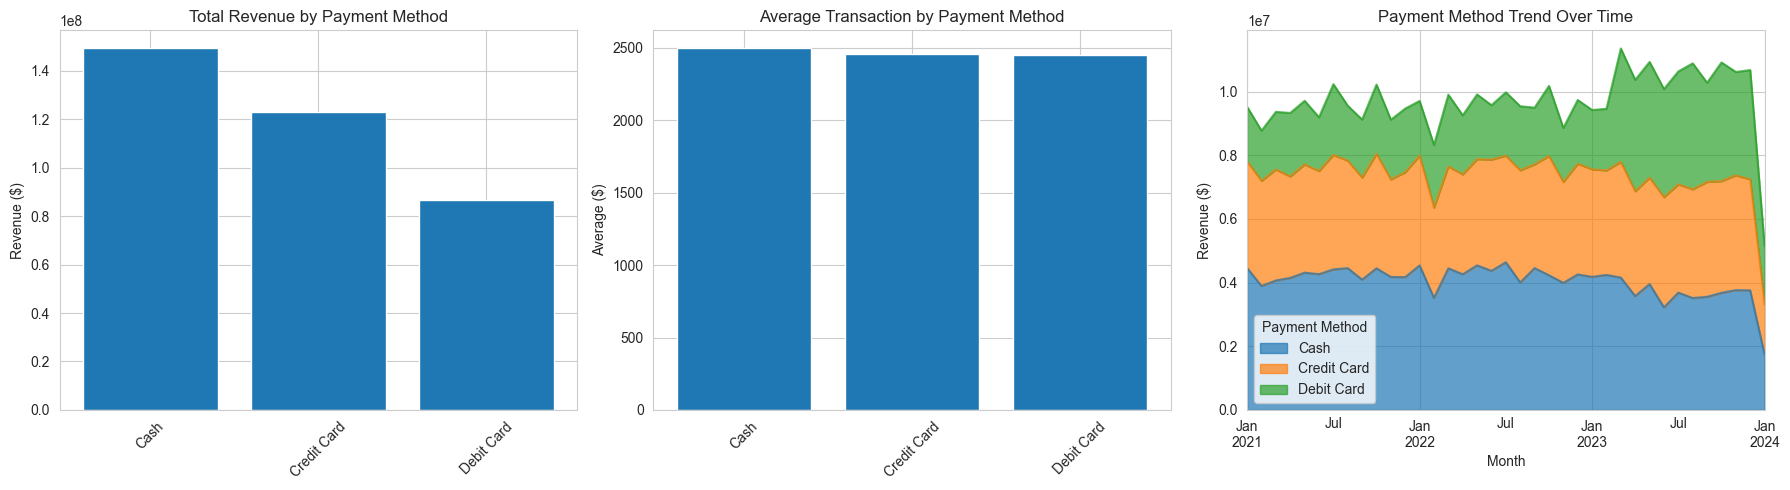


Payment Method Insights:
                total_revenue  avg_transaction  num_transactions  total_items  \
payment_method                                                                  
Cash             1.492175e+08          2495.78             59788       181310   
Credit Card      1.230837e+08          2457.64             50082       151740   
Debit Card       8.666087e+07          2452.55             35335       107488   

                revenue_share  
payment_method                 
Cash                    41.57  
Credit Card             34.29  
Debit Card              24.14  


In [89]:
# Payment method patterns
payment_stats = merged_df.groupby('payment_method').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'quantity': 'sum'
}).round(2)
payment_stats.columns = ['total_revenue', 'avg_transaction', 'num_transactions', 'total_items']
payment_stats['revenue_share'] = (payment_stats['total_revenue'] / 
                                  payment_stats['total_revenue'].sum() * 100).round(2)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Revenue by payment method
axes[0].bar(payment_stats.index, payment_stats['total_revenue'])
axes[0].set_title('Total Revenue by Payment Method')
axes[0].set_ylabel('Revenue ($)')
axes[0].tick_params(axis='x', rotation=45)

# Average transaction
axes[1].bar(payment_stats.index, payment_stats['avg_transaction'])
axes[1].set_title('Average Transaction by Payment Method')
axes[1].set_ylabel('Average ($)')
axes[1].tick_params(axis='x', rotation=45)

# Payment method share over time
payment_monthly = merged_df.groupby([merged_df['invoice_date'].dt.to_period('M'), 
                                     'payment_method'])['total_amount'].sum().unstack(fill_value=0)
payment_monthly.plot(kind='area', stacked=True, ax=axes[2], alpha=0.7)
axes[2].set_title('Payment Method Trend Over Time')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Revenue ($)')
axes[2].legend(title='Payment Method')

plt.tight_layout()
plt.savefig('image/payment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPayment Method Insights:")
print(payment_stats.sort_values('total_revenue', ascending=False))

### 9.7 Key Business Metrics Summary

In [90]:
# Calculate KPIs
total_revenue = merged_df['total_amount'].sum()
total_transactions = len(merged_df)
total_customers = merged_df['customer_id'].nunique()
avg_transaction = merged_df['total_amount'].mean()
avg_items_per_transaction = merged_df['quantity'].mean()
total_items_sold = merged_df['quantity'].sum()

# Customer metrics
customer_lifetime_value = total_revenue / total_customers
transactions_per_customer = total_transactions / total_customers
repeat_customer_rate = (merged_df.groupby('customer_id').size() > 1).sum() / total_customers * 100

# Create summary report
print("="*80)
print("BUSINESS METRICS SUMMARY")
print("="*80)
print(f"\n📊 REVENUE METRICS")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Transaction Value: ${avg_transaction:.2f}")
print(f"Total Transactions: {total_transactions:,}")
print(f"Total Items Sold: {total_items_sold:,}")
print(f"Average Items per Transaction: {avg_items_per_transaction:.2f}")

print(f"\n👥 CUSTOMER METRICS")
print(f"Total Unique Customers: {total_customers:,}")
print(f"Customer Lifetime Value: ${customer_lifetime_value:.2f}")
print(f"Transactions per Customer: {transactions_per_customer:.2f}")
print(f"Repeat Customer Rate: {repeat_customer_rate:.1f}%")

print(f"\n🏆 TOP PERFORMERS")
print(f"Best Category: {category_stats['total_revenue'].idxmax()} (${category_stats['total_revenue'].max():,.2f})")
print(f"Best Day of Week: {dow_sales['sum'].idxmax()}")
print(f"Most Popular Payment: {payment_stats['num_transactions'].idxmax()} ({payment_stats['num_transactions'].max():,} transactions)")

print(f"\n🌤️ WEATHER INSIGHTS")
print(f"Optimal Temperature: {temp_sales['mean'].idxmax()}")
print(f"Rain Impact: {((rainy_sales.mean() - no_rain_sales.mean()) / no_rain_sales.mean() * 100):+.1f}%")

print("\n" + "="*80)

BUSINESS METRICS SUMMARY

📊 REVENUE METRICS
Total Revenue: $358,962,059.54
Average Transaction Value: $2472.11
Total Transactions: 146,671
Total Items Sold: 440,538
Average Items per Transaction: 3.00

👥 CUSTOMER METRICS
Total Unique Customers: 140,310
Customer Lifetime Value: $2558.35
Transactions per Customer: 1.05
Repeat Customer Rate: 4.4%

🏆 TOP PERFORMERS
Best Category: Clothing ($128,910,466.96)
Best Day of Week: Monday
Most Popular Payment: Cash (59,788 transactions)

🌤️ WEATHER INSIGHTS
Optimal Temperature: Cold
Rain Impact: +0.5%



## 10. Save Processed Data

In [100]:
# Save files

merged_df.to_csv('processed_data/sales_weather_merged.csv', index=False)
daily_sales.to_csv('processed_data/daily_sales_summary.csv', index=False)
category_stats.to_csv('processed_data/category_performance.csv')

print("✓ Saved files:")
print("  - sales_weather_merged.csv")
print("  - daily_sales_summary.csv")
print("  - category_performance.csv")
print("\n✓ Analysis Complete!")

✓ Saved files:
  - sales_weather_merged.csv
  - daily_sales_summary.csv
  - category_performance.csv

✓ Analysis Complete!
